#📌 Extracão

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [64]:
dados = pd.read_json('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json')
dados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformação

In [65]:
customer_normalizado = pd.json_normalize(dados['customer'])
customer_normalizado.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


In [66]:
phone_normalizado = pd.json_normalize(dados['phone'])
phone_normalizado.head()

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No


In [67]:
internet_normalizado = pd.json_normalize(dados['internet'])
internet_normalizado.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No


In [68]:
account_normalizado = pd.json_normalize(dados['account'])
account_normalizado.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


In [69]:
df_1 = dados.drop(['customer',	'phone',	'internet',	'account'], axis=1)
df = pd.concat([df_1, customer_normalizado, phone_normalizado, internet_normalizado, account_normalizado], axis=1)
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [70]:
df.columns = df.columns.str.lower().str.replace(' ', '_')



In [71]:
df.head()

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [72]:
condição = df['churn'] == ''

df = df[~condição]

In [73]:
df.head()


,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [74]:
df['churn'].unique()

array(['No', 'Yes'], dtype=object)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   seniorcitizen     7043 non-null   int64  
 4   partner           7043 non-null   object 
 5   dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   phoneservice      7043 non-null   object 
 8   multiplelines     7043 non-null   object 
 9   internetservice   7043 non-null   object 
 10  onlinesecurity    7043 non-null   object 
 11  onlinebackup      7043 non-null   object 
 12  deviceprotection  7043 non-null   object 
 13  techsupport       7043 non-null   object 
 14  streamingtv       7043 non-null   object 
 15  streamingmovies   7043 non-null   object 
 16  contract          7043 non-null   object 
 17  

Colunas a se analizar
eniorCitizen: informação sobre um cliente ter ou não idade igual ou maior que 65 anos
PhoneService: assinatura de serviço telefônico
MultipleLines: assisnatura de mais de uma linha de telefone
InternetService: assinatura de um provedor internet
TechSupport: assinatura adicional de suporte técnico, menos tempo de espera
StreamingTV: assinatura de TV a cabo
StreamingMovies: assinatura de streaming de filmes



In [76]:
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   seniorcitizen     7043 non-null   int64  
 4   partner           7043 non-null   object 
 5   dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   phoneservice      7043 non-null   object 
 8   multiplelines     7043 non-null   object 
 9   internetservice   7043 non-null   object 
 10  onlinesecurity    7043 non-null   object 
 11  onlinebackup      7043 non-null   object 
 12  deviceprotection  7043 non-null   object 
 13  techsupport       7043 non-null   object 
 14  streamingtv       7043 non-null   object 
 15  streamingmovies   7043 non-null   object 
 16  contract          7043 non-null   object 


In [77]:
df['phoneservice'].unique()


array(['Yes', 'No'], dtype=object)

In [78]:
df[['multiplelines' ]].value_counts()

,count
multiplelines,
No,3390
Yes,2971
No phone service,682


Aproximadamente 90% dos que cancelaram serviço com a empresa possuiam serviço de telefone


In [79]:
for coluna in df.columns:
  print(f'\nColuna: {coluna}')
  valores_unicos = df[coluna].unique()
  print(valores_unicos)




Coluna: customerid
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Coluna: churn
['No' 'Yes']

Coluna: gender
['Female' 'Male']

Coluna: seniorcitizen
[0 1]

Coluna: partner
['Yes' 'No']

Coluna: dependents
['Yes' 'No']

Coluna: tenure
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]

Coluna: phoneservice
['Yes' 'No']

Coluna: multiplelines
['No' 'Yes' 'No phone service']

Coluna: internetservice
['DSL' 'Fiber optic' 'No']

Coluna: onlinesecurity
['No' 'Yes' 'No internet service']

Coluna: onlinebackup
['Yes' 'No' 'No internet service']

Coluna: deviceprotection
['No' 'Yes' 'No internet service']

Coluna: techsupport
['Yes' 'No' 'No internet service']

Coluna: streamingtv
['Yes' 'No' 'No internet service']

Coluna: streamingmovies
['No' 'Yes' 'No internet service']

Coluna: c

In [80]:
for coluna in df.columns:
  print(f'\nColuna:{coluna}')
  conta_valores = df[coluna].value_counts()
  print(conta_valores)


Coluna:customerid
customerid
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9970-QBCDA    1
9968-FFVVH    1
             ..
0014-BMAQU    1
0013-SMEOE    1
0013-MHZWF    1
0013-EXCHZ    1
0011-IGKFF    1
Name: count, Length: 7043, dtype: int64

Coluna:churn
churn
No     5174
Yes    1869
Name: count, dtype: int64

Coluna:gender
gender
Male      3555
Female    3488
Name: count, dtype: int64

Coluna:seniorcitizen
seniorcitizen
0    5901
1    1142
Name: count, dtype: int64

Coluna:partner
partner
No     3641
Yes    3402
Name: count, dtype: int64

Coluna:dependents
dependents
No     4933
Yes    2110
Name: count, dtype: int64

Coluna:tenure
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

Coluna:phoneservice
phoneservice
Yes    6361
No      682
Name: count, dtype: int64

Coluna:multiplelines
multiplelines
No                  3390
Yes                 2971
No phone service     682
Name:

In [81]:
print("Contagem de valores ausentes por coluna:")
print(df.isnull().sum())

Contagem de valores ausentes por coluna:
customerid          0
churn               0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
charges.monthly     0
charges.total       0
dtype: int64


In [82]:
numero_duplicados = df.duplicated().sum()
print(f"\nNúmero de linhas completamente duplicadas no DataFrame: {numero_duplicados}")


Número de linhas completamente duplicadas no DataFrame: 0


In [83]:
df.head()

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [84]:
df['seniorcitizen'].unique()
df['seniorcitizen'] = df['seniorcitizen'].map({1: 'Yes', 0: 'No'})

In [85]:
df.head()

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [86]:
df['multiplelines'] = df['multiplelines'].replace('No phone service', 'No')
df['multiplelines'].unique()

array(['No', 'Yes'], dtype=object)

In [87]:
colunas_servicos_internet = ['onlinesecurity', 'onlinebackup', 'deviceprotection',
                             'techsupport', 'streamingtv', 'streamingmovies']
for coluna in colunas_servicos_internet:
  df[coluna] = df[coluna].replace('No internet service', 'No')


In [88]:
for coluna in df.columns:
  print(f'\nColuna: {coluna}')
  valores_unicos = df[coluna].unique()
  print(valores_unicos)



Coluna: customerid
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Coluna: churn
['No' 'Yes']

Coluna: gender
['Female' 'Male']

Coluna: seniorcitizen
['No' 'Yes']

Coluna: partner
['Yes' 'No']

Coluna: dependents
['Yes' 'No']

Coluna: tenure
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]

Coluna: phoneservice
['Yes' 'No']

Coluna: multiplelines
['No' 'Yes']

Coluna: internetservice
['DSL' 'Fiber optic' 'No']

Coluna: onlinesecurity
['No' 'Yes']

Coluna: onlinebackup
['Yes' 'No']

Coluna: deviceprotection
['No' 'Yes']

Coluna: techsupport
['Yes' 'No']

Coluna: streamingtv
['Yes' 'No']

Coluna: streamingmovies
['No' 'Yes']

Coluna: contract
['One year' 'Month-to-month' 'Two year']

Coluna: paperlessbilling
['Yes' 'No']

Coluna: paymentmethod
['Mailed check' 'Electronic check

In [89]:
df.head()


,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [90]:
df['charges.total'] = pd.to_numeric(df['charges.total'], errors='coerce')


In [91]:
df['charges.total'].isnull().sum()

np.int64(11)

In [92]:
linha_nan = df['charges.total'].isnull()

df.loc [linha_nan, 'charges.total'] = df.loc[linha_nan, 'charges.monthly'] * df.loc[linha_nan, 'tenure']

df['charges.total'].isnull().sum()


np.int64(0)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   seniorcitizen     7043 non-null   object 
 4   partner           7043 non-null   object 
 5   dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   phoneservice      7043 non-null   object 
 8   multiplelines     7043 non-null   object 
 9   internetservice   7043 non-null   object 
 10  onlinesecurity    7043 non-null   object 
 11  onlinebackup      7043 non-null   object 
 12  deviceprotection  7043 non-null   object 
 13  techsupport       7043 non-null   object 
 14  streamingtv       7043 non-null   object 
 15  streamingmovies   7043 non-null   object 
 16  contract          7043 non-null   object 


In [94]:
coluna_yesno_para_bool = ['churn','seniorcitizen','partner',	'dependents',
                          'phoneservice', 'multiplelines', 'onlinesecurity',
                          'deviceprotection',	'techsupport', 'streamingtv',
                          'streamingmovies', 'paperlessbilling', 'onlinebackup']
for coluna in coluna_yesno_para_bool:
  df[coluna] = df[coluna].map({'Yes': 1, 'No': 0})



In [95]:
df.head()

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.6,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40


In [96]:
df.columns = df.columns.str.replace('.', '_', regex=False)

In [97]:
df.head()

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.6,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   churn             7043 non-null   int64  
 2   gender            7043 non-null   object 
 3   seniorcitizen     7043 non-null   int64  
 4   partner           7043 non-null   int64  
 5   dependents        7043 non-null   int64  
 6   tenure            7043 non-null   int64  
 7   phoneservice      7043 non-null   int64  
 8   multiplelines     7043 non-null   int64  
 9   internetservice   7043 non-null   object 
 10  onlinesecurity    7043 non-null   int64  
 11  onlinebackup      7043 non-null   int64  
 12  deviceprotection  7043 non-null   int64  
 13  techsupport       7043 non-null   int64  
 14  streamingtv       7043 non-null   int64  
 15  streamingmovies   7043 non-null   int64  
 16  contract          7043 non-null   object 


In [99]:
df['contas_diarias'] = df['charges_monthly'] / 30
df['contas_diarias'] = df['contas_diarias'].round(2)

In [100]:
df.head()


,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total,contas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80


#📊 Carga e análise

In [101]:
contagem_cancelamentos = df['churn'].value_counts().reset_index()
contagem_cancelamentos.columns = ['status_cancelamento', 'contagem']
contagem_cancelamentos['status_cancelamento'] = contagem_cancelamentos['status_cancelamento'].map({0:'ficaram', 1 : 'sairam' })
contagem_cancelamentos

,status_cancelamento,contagem
0,ficaram,5174
1,sairam,1869


In [102]:
fig = px.pie(contagem_cancelamentos,
             values='contagem',
             names='status_cancelamento',
             title='Proporção de Cancelamento de Clientes',
             hole= 0.4,
             color_discrete_map={'Ficaram':'#20c997', 'Saíram':'#fa5252'},
             labels={'status_churn': 'Status do Cliente', 'contagem': 'Número de Clientes'})
fig.update_traces(textposition='outside',
                  textinfo='percent',
                  hovertemplate='<b>%{label}</b><br>Número de Clientes: %{value}<br>Porcentagem: %{percent}<extra></extra>')

fig.show()

In [103]:
df.describe()

,churn,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,charges_monthly,charges_total,contas_diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2279.734304,2.158675
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.794470,1.003088
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.610000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,398.550000,1.180000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1394.550000,2.340000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3786.600000,2.990000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.960000


Primeira análise: na coluna "churn" tem uma "mean" de 0.26, ou seja, 26% dos contratos foram cancelados.

Segunda análise: na coluna "seniorcitizen" nos indica que apenas 16% dos clientes são idosos, ou seja nosso maior publico é jovem

Terceira análise: a coluna "phoneservice" nos indica que 90% dos nossos clientes possuem serviço telefônico

Quarta análise: a grande divergência entre média(mean), desvio(std) e mediana(50%) nas colunas "tenure" "charges_monthly" e "charge_total", nos indica que uma grande variação no tempo de contrato, sendo uns muito curtos e outros muito longos

In [104]:
cancelamento_por_contrato = df.groupby('contract')['churn'].mean().reset_index()
cancelamento_por_contrato

,contract,churn
0,Month-to-month,0.427097
1,One year,0.112695
2,Two year,0.028319


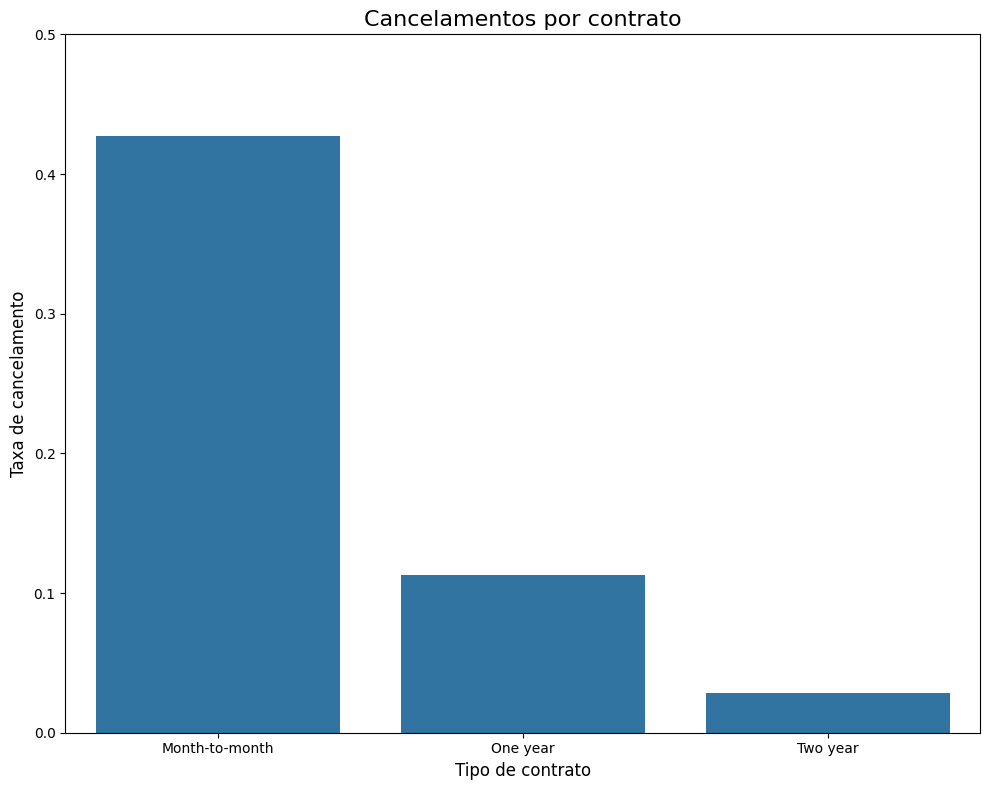

In [105]:
plt.figure(figsize=(10,8))

sns.barplot(x='contract', y='churn', data=cancelamento_por_contrato.sort_values('churn', ascending=False))
plt.title('Cancelamentos por contrato', fontsize = 16)
plt.xlabel('Tipo de contrato', fontsize = 12)
plt.ylabel('Taxa de cancelamento', fontsize = 12)
plt.ylim(0, 0.5)
plt.tight_layout()
plt.show()

Análise: o tipo de contrato mensal tem quase 50% de cancelamento o que é um número altissimo, o de 1 ano ja cai para 11% e o de 2 anos paara 2% o que nos mostra que o compromisso contratual é um fator muito forte para retenção de clientes

In [106]:
cancelamento_por_internet =  df.groupby('internetservice')['churn'].mean().reset_index()
cancelamento_por_internet

,internetservice,churn
0,DSL,0.189591
1,Fiber optic,0.418928
2,No,0.074050


In [107]:
cancelamento_internet_contrato = pd.crosstab(df['internetservice'], df['contract'], values=df['churn'], aggfunc='mean')

Análise: a Fibra Ótica sozinha ja gera um alto número de cancelamentos, 41%, ao combinarmos este dado com o tipo de contrato, verificamos que clientes com Fibra Ótica e contrato mes a mes tem 54% de cancelamento ou seja mais de 1 a cada 2 clientes estão cancelando


In [108]:
cancelamento_por_metodo_pagamento = df.groupby('paymentmethod')['churn'].mean().reset_index()
cancelamento_por_metodo_pagamento



,paymentmethod,churn
0,Bank transfer (automatic),0.167098
1,Credit card (automatic),0.152431
2,Electronic check,0.452854
3,Mailed check,0.191067


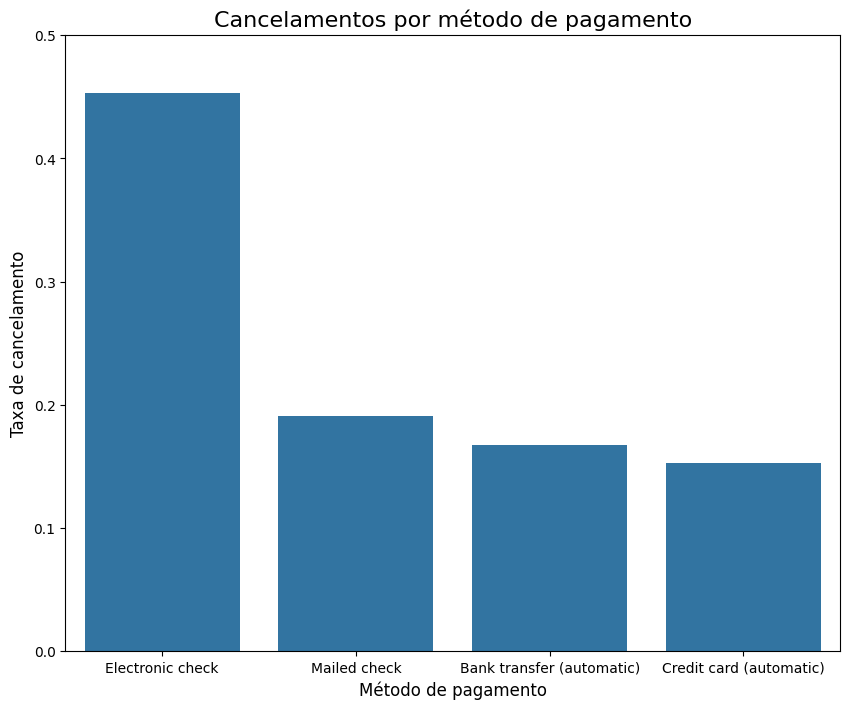

In [109]:
plt.figure(figsize=(10,8))
sns.barplot(x='paymentmethod', y='churn', data=cancelamento_por_metodo_pagamento.sort_values('churn', ascending=False))
plt.title('Cancelamentos por método de pagamento',fontsize=16)
plt.xlabel('Método de pagamento', fontsize=12)
plt.ylabel('Taxa de cancelamento', fontsize=12)
plt.ylim(0, 0.5)
plt.show()

O método de pagamento manual esta fortemente associado a um maior cancelamento.
Quando um cliente precisaa fazer um pagamento manual todo mês, ele é forçado a reavaliar se a continuidade do contrato está valendo a pena financeiramente.

In [110]:
analise_numerica_por_cancelamento = df.groupby('churn')[['tenure', 'charges_monthly', 'charges_total']].describe()
analise_numerica_por_cancelamento

tenure                                                     \
        count       mean        std  min   25%   50%   75%   max   
churn                                                              
0      5174.0  37.569965  24.113777  0.0  15.0  38.0  61.0  72.0   
1      1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0   

      charges_monthly             ...               charges_total  \
                count       mean  ...   75%     max         count   
churn                             ...                               
0              5174.0  61.265124  ...  88.4  118.75        5174.0   
1              1869.0  74.441332  ...  94.2  118.35        1869.0   

                                                                           
              mean          std    min    25%       50%      75%      max  
churn                                                                      
0      2549.911442  2329.954215   0.00  572.9  1679.525  4262.85  8672.45  
1      1531.796094  1890.822994  18.85  134.5   703.550  2331.30  8684.80  

[2 rows x 24 columns]

Os clientes que saem, geralmentem saem com menos da metade de tempo de casa dos que ficam, percebe-se que o primeiro ano é o mais crítico para a retenção

Os clientes que cancelam, pagam em média 13$ a mais por mes que os clientes fiéis

 O gasto total de quem sai é menor e isso não é um motivo do cancelamento, é uma consequencia do tenure baixo

#📄Relatorio Final

O objetivo principal deste projeto foi identificar os principais fatores e características que influenciam a decisão de um cliente cancelar seu serviço, um fenômeno conhecido como "churn".

Para garantir a precisão e a confiabilidade da análise, os dados brutos passaram por um processo completo de limpeza e tratamento. As seguintes etapas foram executadas utilizando a biblioteca Pandas em Python:

Limpeza e Tratamento de Dados:

1- Inspeção Inicial: Os dados foram carregados e uma inspeção inicial foi realizada para entender a estrutura, os tipos de dados e a presença de valores ausentes.

2.1- Tratamento de Dados Ausentes: Foi identificado que a coluna charges_total continha valores inválidos (espaços em branco) para clientes novos. Estes foram convertidos para o formato numérico, o que os tornou valores nulos (NaN). Posteriormente, esses 11 valores nulos foram preenchidos de forma inteligente, utilizando a hipótese de que o gasto total seria o produto do tempo de contrato (tenure) pela mensalidade (charges_monthly), garantindo uma imputação de dados precisa.

2.2- Tratamento de Dados Ausentes: Foi identificado que a coluna churn, continha valores inválidos (espaço em branco). Estas linhas foram removidas para eviter o impacto negativo em futuras anáises.

3- Padronização de Categorias: Valores como "No internet service" e "No phone service" foram padronizados para "No" nas colunas de serviços correspondentes, unificando a representação de ausência de serviço.

4- Conversão de Tipos: Colunas de texto binárias (ex: 'Yes'/'No') foram sistematicamente convertidas para o formato numérico (1/0) para facilitar cálculos de proporção e preparar o dataset para futuras aplicações de machine learning.

5-Renomeação de Colunas: Para facilitar o acesso e manipulação, colunas com nomes contendo caracteres especiais, como charges.total, foram renomeadas para o padrão charges_total.

Análise exploratória dos Dados:

1- Visão geral de cancelamentos (churn): A análise inicial revelou que a taxa de churn geral no conjunto de dados é de 26,5%. Isso significa que mais de um quarto da base de clientes cancelou o serviço, um número significativo que justifica uma investigação aprofundada.



In [111]:
fig = px.pie(contagem_cancelamentos,
             values='contagem',
             names='status_cancelamento',
             title='Proporção de Cancelamento de Clientes',
             hole= 0.4,
             color_discrete_map={'Ficaram':'#20c997', 'Saíram':'#fa5252'},
             labels={'status_churn': 'Status do Cliente', 'contagem': 'Número de Clientes'})
fig.update_traces(textposition='outside',
                  textinfo='percent',
                  hovertemplate='<b>%{label}</b><br>Número de Clientes: %{value}<br>Porcentagem: %{percent}<extra></extra>')

fig.show()

2- Tipo de Contrato: Clientes com contrato "Mês a Mês" apresentam uma taxa de churn alarmante de 43%. Em contraste, clientes com contratos de um ano (11%) e dois anos (3%) são drasticamente mais fiéis. Isso indica que a falta de um compromisso de longo prazo é o principal fator de risco para a evasão.

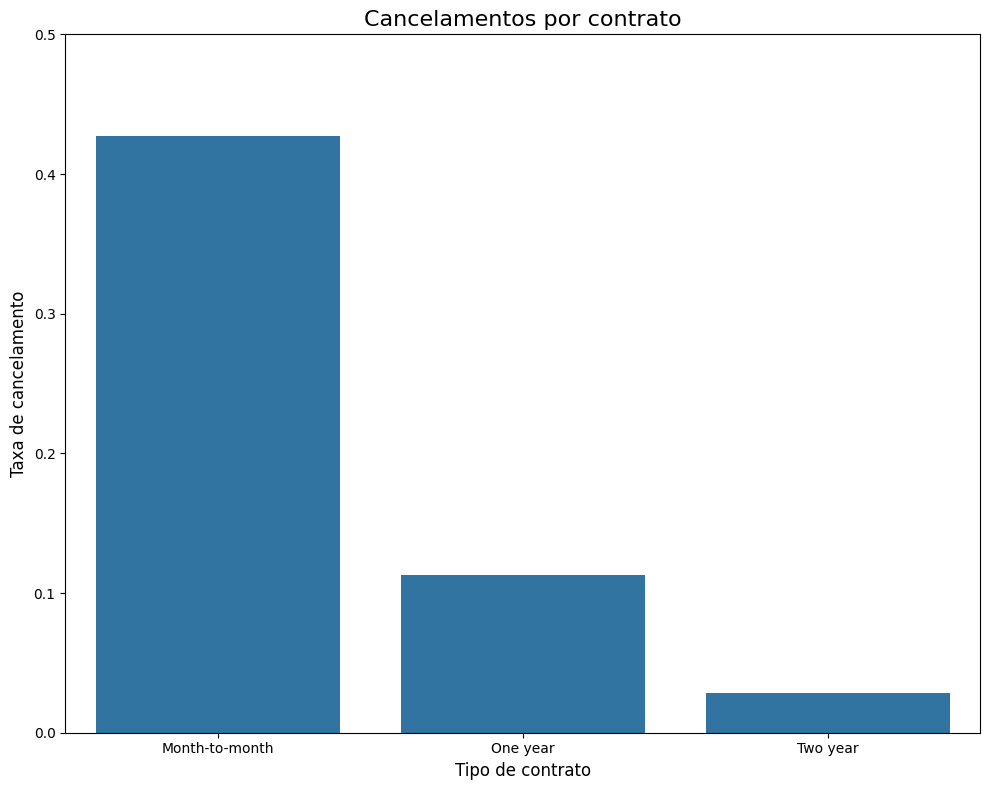

In [112]:
plt.figure(figsize=(10,8))

sns.barplot(x='contract', y='churn', data=cancelamento_por_contrato.sort_values('churn', ascending=False))
plt.title('Cancelamentos por contrato', fontsize = 16)
plt.xlabel('Tipo de contrato', fontsize = 12)
plt.ylabel('Taxa de cancelamento', fontsize = 12)
plt.ylim(0, 0.5)
plt.tight_layout()
plt.show()

3- Método de Pagamento: Clientes que utilizam "Cheque Eletrônico" como forma de pagamento cancelam a uma taxa de 45%. Este método, que exige uma ação manual mensal, apresenta um risco muito maior do que métodos automáticos como Cartão de Crédito (15%) e Transferência Bancária (17%).

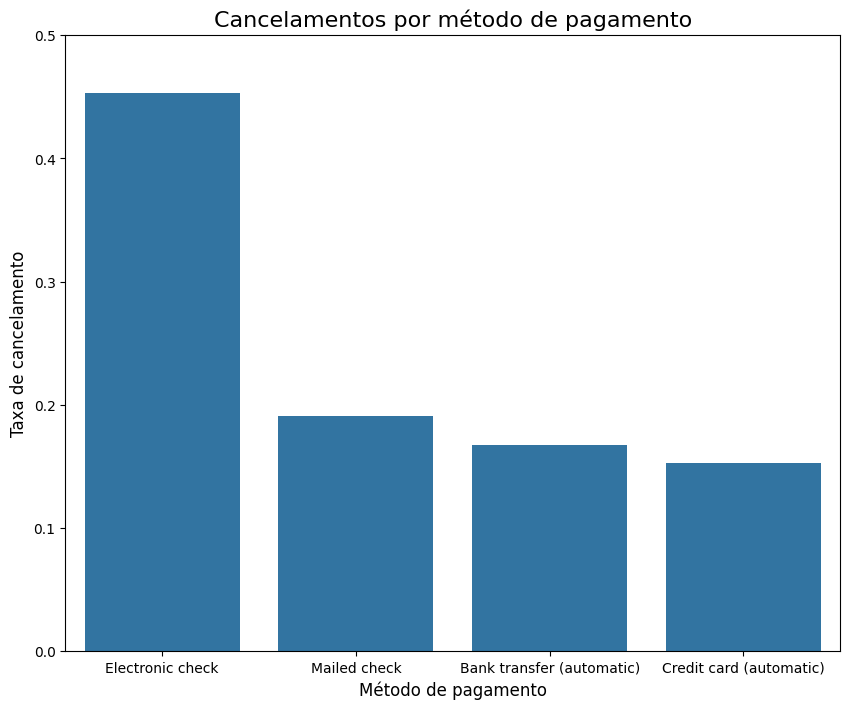

In [113]:
plt.figure(figsize=(10,8))
sns.barplot(x='paymentmethod', y='churn', data=cancelamento_por_metodo_pagamento.sort_values('churn', ascending=False))
plt.title('Cancelamentos por método de pagamento',fontsize=16)
plt.xlabel('Método de pagamento', fontsize=12)
plt.ylabel('Taxa de cancelamento', fontsize=12)
plt.ylim(0, 0.5)
plt.show()

4- Tipo de Internet: Curiosamente, o serviço premium de Fibra Ótica está associado a uma alta taxa de churn de 42%, em comparação com os 19% do serviço DSL. Uma análise mais profunda revelou que o risco é exacerbado pela combinação de Fibra Ótica com o contrato Mês a Mês, onde a taxa de churn chega a 55%.

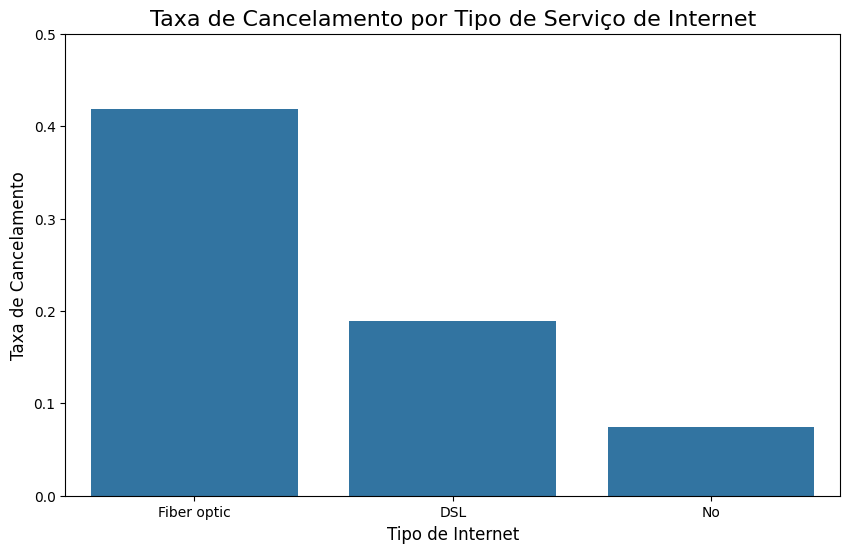

In [114]:
plt.figure(figsize=(10, 6))
sns.barplot(x='internetservice', y='churn', data=cancelamento_por_internet.sort_values('churn', ascending=False))

plt.title('Taxa de Cancelamento por Tipo de Serviço de Internet', fontsize=16)
plt.xlabel('Tipo de Internet', fontsize=12)
plt.ylabel('Taxa de Cancelamento', fontsize=12)
plt.ylim(0, 0.5)
plt.show()

CONCLUSÃO:


O perfil do cliente com maior risco de churn é:
Um cliente com pouco tempo de contrato (geralmente menos de 1 ano), que possui um contrato "Mês a Mês", paga uma mensalidade mais elevada (frequentemente por um serviço de Fibra Ótica) e utiliza um método de pagamento manual como o Cheque Eletrônico.

A combinação de um alto custo mensal com um baixo compromisso contratual cria o cenário perfeito para o cancelamento do serviço.

RECOMENDAÇÕES:

1- Foco em Contratos de Longo Prazo: Desenvolver campanhas de marketing e ofertas agressivas para incentivar clientes do plano "Mês a Mês" a migrarem para planos anuais ou bianuais. Um desconto na adesão a um contrato mais longo pode ter um alto retorno sobre o investimento.

2- Otimização dos Métodos de Pagamento: Criar incentivos (como um pequeno crédito na fatura) para que clientes que usam "Cheque Eletrônico" migrem para métodos de pagamento automáticos (Cartão de Crédito ou Débito em Conta), reduzindo a "fricção" mensal do pagamento.

3- Revisão da Experiência da Fibra Ótica: Conduzir uma investigação aprofundada sobre a jornada do cliente com o serviço de Fibra Ótica. A alta taxa de churn neste segmento, apesar da qualidade superior da tecnologia, pode indicar problemas de precificação, instabilidade na entrega do serviço ou falhas no suporte técnico que precisam ser urgentemente corrigidos.

4- Desenvolvimento de um Sistema de Alerta Proativo: Utilizar os fatores de risco identificados (contrato, método de pagamento, tipo de serviço, tenure, etc.) para criar um "score de risco de churn" para cada cliente. Clientes que atingirem um determinado limiar de risco devem ser abordados proativamente pela equipe de retenção com ofertas personalizadas e suporte especial, antes mesmo que considerem cancelar.